# Movie Rating Analysis
### Author: Sai Acharya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_movies = pd.read_table('movies.dat', sep='::', header=None, engine='python')

In [3]:
df_movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.columns = ['movie_id', 'movie', 'genre']

In [5]:
df_movies

,movie_id,movie,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
df_movies.shape

(3883, 3)

In [7]:
df_ratings = pd.read_table('ratings.dat', sep='::', header=None, engine='python')

In [8]:
df_ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
df_ratings.columns= ['user_id', 'movie_id', 'rating', 'Label']

In [10]:
df_ratings

,user_id,movie_id,rating,Label
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [11]:
#Dropping dummy values from the dataframe
df_ratings.drop(['Label'], axis =1, inplace=True)
df_ratings

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [12]:
df_ratings.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

In [13]:
df_users = pd.read_table('users.dat', sep='::', header=None, engine='python')

In [14]:
df_users

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [15]:
df_users.columns = ['user_id', 'gender', 'age', 'label', 'label_index']
df_users

,user_id,gender,age,label,label_index
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [16]:
#Dropping label_index and label from the dataframe
df_users.drop(['label_index', 'label'], axis=1, inplace=True)

In [17]:
df_users

,user_id,gender,age
0,1,F,1
1,2,M,56
2,3,M,25
3,4,M,45
4,5,M,25
...,...,...,...
6035,6036,F,25
6036,6037,F,45
6037,6038,F,56
6038,6039,F,45


In [18]:
df_users[df_users['age']==1].value_counts()

user_id  gender  age
6006     F       1      1
1468     M       1      1
1818     M       1      1
1815     M       1      1
1789     M       1      1
                       ..
3573     M       1      1
3537     M       1      1
3460     M       1      1
3382     F       1      1
1        F       1      1
Length: 222, dtype: int64

We can see that there are around 222 incorrect entries in the above dataset since practically its impossible for a 1 year old child to rate a movie. So we will change these values in the 'age' column with the mean age.

In [19]:
mean_age = df_users['age'].mean()
df_users['age'].replace(to_replace = 1, value = mean_age, inplace=True)

In [20]:
#Checking if the values have been replaced
df_users[df_users['age']==1].value_counts()

Series([], dtype: int64)

In [21]:
df_users.dtypes

user_id      int64
gender      object
age        float64
dtype: object

In [22]:
df_users = df_users.astype({'age':int})

In [23]:
df_users.dtypes

user_id     int64
gender     object
age         int32
dtype: object

In [24]:
user_rating_df = pd.merge(df_users, df_ratings, on='user_id')

In [25]:
user_rating_df

,user_id,gender,age,movie_id,rating
0,1,F,30,1193,5
1,1,F,30,661,3
2,1,F,30,914,3
3,1,F,30,3408,4
4,1,F,30,2355,5
...,...,...,...,...,...
1000204,6040,M,25,1091,1
1000205,6040,M,25,1094,5
1000206,6040,M,25,562,5
1000207,6040,M,25,1096,4


In [26]:
data_merged = pd.merge(user_rating_df, df_movies, on='movie_id')

In [27]:
data_merged

,user_id,gender,age,movie_id,rating,movie,genre
0,1,F,30,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...
1000204,5949,M,18,2198,5,Modulations (1998),Documentary
1000205,5675,M,35,2703,3,Broken Vessels (1998),Drama
1000206,5780,M,18,2845,1,White Boys (1999),Drama
1000207,5851,F,18,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [28]:
data_merged.isnull().sum()

user_id     0
gender      0
age         0
movie_id    0
rating      0
movie       0
genre       0
dtype: int64

#### 1. USER AGE DISTRIBUTION

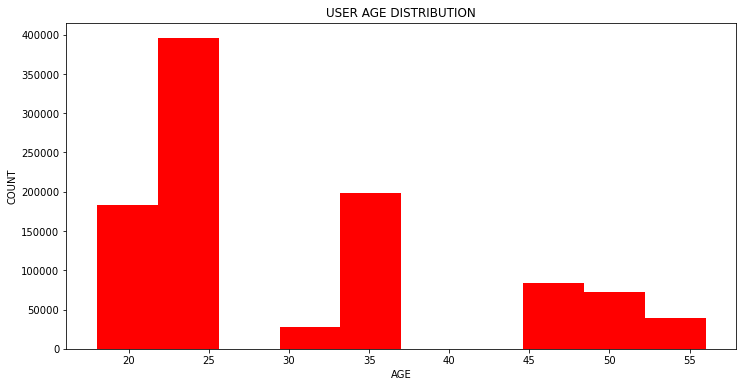

In [29]:
plt.figure(figsize=(12,6))
plt.hist(data_merged['age'], color='red')
plt.title('USER AGE DISTRIBUTION')
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show();

From the above histogram, one can see that majority of the viewers are in the age group of 22-26 years followed by people aged between 33-37 years. One can also see that the viewership count decreases drastically with age, pointing out that people minimise watching movies with growing age.

#### 2. USER RATING OF THE MOVIE 'TOY STORY'

In [30]:
toystory = data_merged[data_merged['movie']=='Toy Story (1995)']

In [31]:
toystory

,user_id,gender,age,movie_id,rating,movie,genre
41626,1,F,30,1,5,Toy Story (1995),Animation|Children's|Comedy
41627,6,F,50,1,4,Toy Story (1995),Animation|Children's|Comedy
41628,8,M,25,1,4,Toy Story (1995),Animation|Children's|Comedy
41629,9,M,25,1,5,Toy Story (1995),Animation|Children's|Comedy
41630,10,F,35,1,5,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...
43698,6022,M,25,1,5,Toy Story (1995),Animation|Children's|Comedy
43699,6025,F,25,1,5,Toy Story (1995),Animation|Children's|Comedy
43700,6032,M,45,1,4,Toy Story (1995),Animation|Children's|Comedy
43701,6035,F,25,1,4,Toy Story (1995),Animation|Children's|Comedy


In [32]:
toystory['rating'].mean()

4.146846413095811

The Average rating for the movie 'Toy Story (1995)' given by the viewers is 4.1

In [33]:
toystory['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [34]:
plotting_data = toystory['rating'].value_counts()

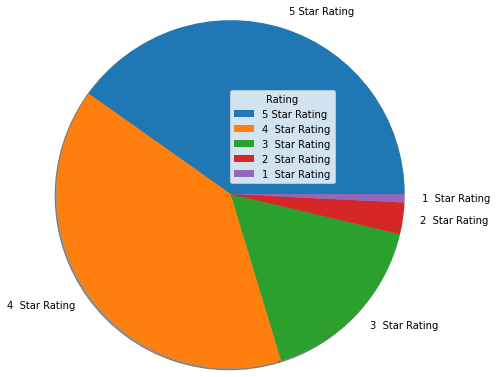

In [35]:
pie_label = ['5 Star Rating','4  Star Rating','3  Star Rating','2  Star Rating','1  Star Rating']
plt.pie(plotting_data, labels=pie_label, shadow=True, radius = 2)
plt.legend(title='Rating')
plt.show()

#### 3. TOP 25 MOVIES BY VIEWERSHIP RATINGS

In [36]:
data_merged.head()

,user_id,gender,age,movie_id,rating,movie,genre
0,1,F,30,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [37]:
movie_size = data_merged.groupby('movie').size()

In [38]:
rated = data_merged.groupby('movie').agg({'rating': [np.size,np.mean]})
rated.head()

rating          
                                size      mean
movie                                         
$1,000,000 Duck (1971)            37  3.027027
'Night Mother (1986)              70  3.371429
'Til There Was You (1997)         52  2.692308
'burbs, The (1989)               303  2.910891
...And Justice for All (1979)    199  3.713568

In [39]:
top_rated = rated.sort_values([('rating', 'mean')], ascending=False)
top_rated.head(25)

rating          
                                                     size      mean
movie                                                              
Ulysses (Ulisse) (1954)                                 1  5.000000
Lured (1947)                                            1  5.000000
Follow the Bitch (1998)                                 1  5.000000
Bittersweet Motel (2000)                                1  5.000000
Song of Freedom (1936)                                  1  5.000000
One Little Indian (1973)                                1  5.000000
Smashing Time (1967)                                    2  5.000000
Schlafes Bruder (Brother of Sleep) (1995)               1  5.000000
Gate of Heavenly Peace, The (1995)                      3  5.000000
Baby, The (1973)                                        1  5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                     5  4.800000
Lamerica (1994)                                         8  4.750000
Apple, The (Sib) (1998)                                 9  4.666667
Sanjuro (1962)                                         69  4.608696
Seven Samurai (The Magnificent Seven) (Shichini...    628  4.560510
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966
Close Shave, A (1995)                                 657  4.520548
Usual Suspects, The (1995)                           1783  4.517106
Schindler's List (1993)                              2304  4.510417
Wrong Trousers, The (1993)                            882  4.507937
Dry Cleaning (Nettoyage à sec) (1997)                   2  4.500000
Inheritors, The (Die Siebtelbauern) (1998)              2  4.500000
Mamma Roma (1962)                                       2  4.500000
Bells, The (1926)                                       2  4.500000

#### 4. MOVIES RATED BY USER WITH USER-ID 2696

In [40]:
user_id_rating = data_merged.loc[data_merged['user_id']==2696]
user_id_rating 

,user_id,gender,age,movie_id,rating,movie,genre
24345,2696,M,25,1270,2,Back to the Future (1985),Comedy|Sci-Fi
29848,2696,M,25,1097,3,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696,M,25,1617,4,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696,M,25,800,5,Lone Star (1996),Drama|Mystery
273633,2696,M,25,3386,1,JFK (1991),Drama|Mystery
277808,2696,M,25,3176,4,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696,M,25,1711,4,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696,M,25,1589,3,Cop Land (1997),Crime|Drama|Mystery
598042,2696,M,25,1783,4,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696,M,25,1892,4,"Perfect Murder, A (1998)",Mystery|Thriller


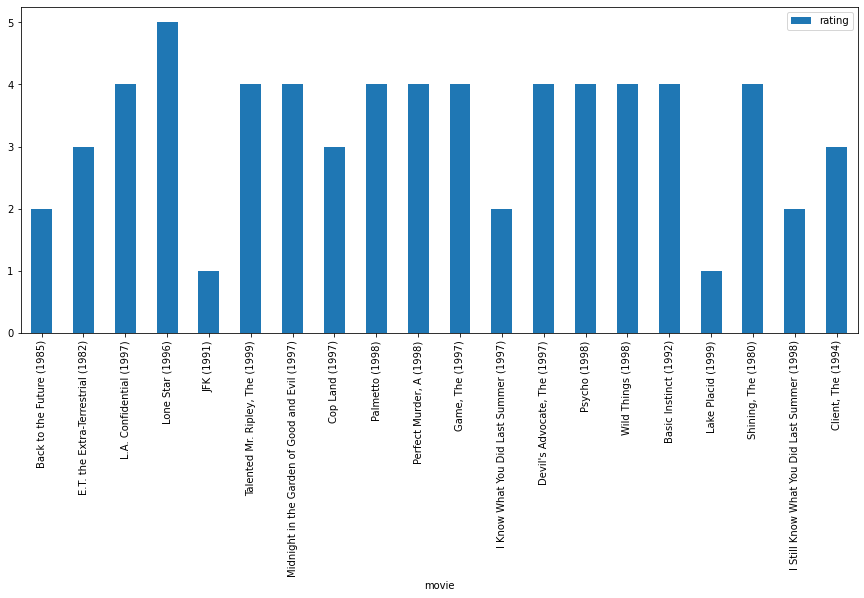

In [41]:
user_id_rating.plot.bar(x='movie', y='rating', figsize=(15,6));

#### 5. LISTING ALL THE UNIQUE GENRES

In [42]:
data_merged.head()

,user_id,gender,age,movie_id,rating,movie,genre
0,1,F,30,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [43]:
data_merged['genre'].dtype

dtype('O')

In [44]:
data_merged['genre'] = data_merged['genre'].str.split('|')

In [45]:
data_merged

,user_id,gender,age,movie_id,rating,movie,genre
0,1,F,30,1193,5,One Flew Over the Cuckoo's Nest (1975),[Drama]
1,2,M,56,1193,5,One Flew Over the Cuckoo's Nest (1975),[Drama]
2,12,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),[Drama]
3,15,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),[Drama]
4,17,M,50,1193,5,One Flew Over the Cuckoo's Nest (1975),[Drama]
...,...,...,...,...,...,...,...
1000204,5949,M,18,2198,5,Modulations (1998),[Documentary]
1000205,5675,M,35,2703,3,Broken Vessels (1998),[Drama]
1000206,5780,M,18,2845,1,White Boys (1999),[Drama]
1000207,5851,F,18,3607,5,One Little Indian (1973),"[Comedy, Drama, Western]"


In [46]:
data_merged = data_merged.explode('genre')

In [47]:
data_merged

,user_id,gender,age,movie_id,rating,movie,genre
0,1,F,30,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...
1000206,5780,M,18,2845,1,White Boys (1999),Drama
1000207,5851,F,18,3607,5,One Little Indian (1973),Comedy
1000207,5851,F,18,3607,5,One Little Indian (1973),Drama
1000207,5851,F,18,3607,5,One Little Indian (1973),Western


In [48]:
array = data_merged['genre'].unique()

In [49]:
array.tolist()

['Drama',
 'Animation',
 "Children's",
 'Musical',
 'Romance',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Thriller',
 'Crime',
 'Mystery',
 'Western',
 'Horror',
 'Film-Noir',
 'Documentary']

From the above list, we can see that there are total 18 unique genre in the given dataset.

#### 6. ONE-HOT ENCODING

In [50]:
data_merged = pd.get_dummies(data_merged, columns=['genre'])

In [51]:
data_merged

,user_id,gender,age,movie_id,rating,movie,genre_Action,genre_Adventure,genre_Animation,genre_Children's,...,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,F,30,1193,5,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,M,56,1193,5,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,M,25,1193,4,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,M,50,1193,5,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,5780,M,18,2845,1,White Boys (1999),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,F,18,3607,5,One Little Indian (1973),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,F,18,3607,5,One Little Indian (1973),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,F,18,3607,5,One Little Indian (1973),0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
data_merged.corr()

,user_id,age,movie_id,rating,genre_Action,genre_Adventure,genre_Animation,genre_Children's,genre_Comedy,genre_Crime,...,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
user_id,1.000000,0.024516,-0.015199,0.011808,-0.001646,-0.000707,-0.005359,-0.003466,-0.002654,0.002144,...,0.001379,0.003131,-0.001128,-0.000289,0.002817,0.004240,-0.002435,-0.001026,0.002188,0.002721
age,0.024516,1.000000,0.029284,0.059356,-0.019506,-0.007685,-0.022243,-0.020579,-0.019802,-0.007002,...,-0.013168,0.023944,-0.014870,0.010123,0.018050,0.013434,-0.005480,-0.008409,0.028437,0.026867
movie_id,-0.015199,0.029284,1.000000,-0.071802,0.003315,-0.034615,0.001994,-0.034122,0.075449,-0.026516,...,-0.002276,-0.006143,0.055794,-0.029850,-0.008515,-0.057568,0.015409,-0.013127,-0.041772,0.010948
rating,0.011808,0.059356,-0.071802,1.000000,-0.030583,-0.024610,0.013282,-0.027115,-0.024486,0.022392,...,-0.016053,0.041296,-0.063923,0.010543,0.010690,0.006119,-0.029562,-0.003420,0.051083,0.004926
genre_Action,-0.001646,-0.019506,0.003315,-0.030583,1.000000,-0.097478,-0.054183,-0.070461,-0.168881,-0.074098,...,-0.049531,-0.034978,-0.072557,-0.053047,-0.052158,-0.102651,-0.106262,-0.117674,-0.068590,-0.037247
genre_Adventure,-0.000707,-0.007685,-0.034615,-0.024610,-0.097478,1.000000,-0.037836,-0.049204,-0.117932,-0.051743,...,-0.034588,-0.024425,-0.050667,-0.037044,-0.036422,-0.071683,-0.074204,-0.082173,-0.047897,-0.026010
genre_Animation,-0.005359,-0.022243,0.001994,0.013282,-0.054183,-0.037836,1.000000,-0.027349,-0.065551,-0.028761,...,-0.019225,-0.013577,-0.028163,-0.020590,-0.020245,-0.039844,-0.041246,-0.045675,-0.026623,-0.014457
genre_Children's,-0.003466,-0.020579,-0.034122,-0.027115,-0.070461,-0.049204,-0.027349,1.000000,-0.085245,-0.037402,...,-0.025001,-0.017655,-0.036624,-0.026776,-0.026327,-0.051815,-0.053637,-0.059398,-0.034622,-0.018801
genre_Comedy,-0.002654,-0.019802,0.075449,-0.024486,-0.168881,-0.117932,-0.065551,-0.085245,1.000000,-0.089645,...,-0.059923,-0.042317,-0.087781,-0.064178,-0.063101,-0.124190,-0.128559,-0.142365,-0.082982,-0.045062
genre_Crime,0.002144,-0.007002,-0.026516,0.022392,-0.074098,-0.051743,-0.028761,-0.037402,-0.089645,1.000000,...,-0.026292,-0.018567,-0.038514,-0.028158,-0.027686,-0.054489,-0.056406,-0.062464,-0.036409,-0.019771


From the above, we can say that there is very little or no correlation between different features of the dataset.